# Project -1 NN for classification

In [1]:
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print("x_train.shape: ",x_train.shape)

x_train.shape:  (60000, 28, 28)


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128 , activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2945 - accuracy: 0.9133 - val_loss: 0.1395 - val_accuracy: 0.9577
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1408 - accuracy: 0.9589 - val_loss: 0.1000 - val_accuracy: 0.9695
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1060 - accuracy: 0.9685 - val_loss: 0.0817 - val_accuracy: 0.9737
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0867 - accuracy: 0.9738 - val_loss: 0.0780 - val_accuracy: 0.9750
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0736 - accuracy: 0.9769 - val_loss: 0.0678 - val_accuracy: 0.9782
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0636 - accuracy: 0.9793 - val_loss: 0.0668 - val_accuracy: 0.9792
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0572 - accuracy: 0.9812 - val_loss: 0.0682 - val_accuracy:

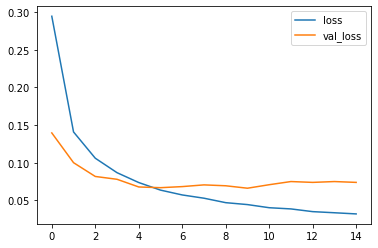

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

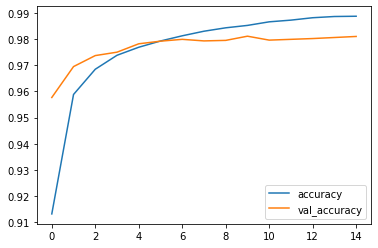

In [15]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [16]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0738 - accuracy: 0.9810
[0.07383044064044952, 0.9810000061988831]


In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
print(cm)

[[ 971    1    0    2    0    1    2    1    2    0]
 [   0 1125    3    1    0    0    2    0    4    0]
 [   3    1 1005    3    1    0    4    8    7    0]
 [   0    0    3  984    0    6    0    5    5    7]
 [   1    0    2    0  964    1    6    1    1    6]
 [   2    0    0    6    1  873    4    0    5    1]
 [   4    2    1    1    1    2  945    0    2    0]
 [   2    3    7    0    1    0    0 1009    2    4]
 [   6    0    3    3    3    4    1    2  949    3]
 [   5    2    0    1    8    2    0    5    1  985]]


Text(0.5, 1.0, 'True label: 5 Predicted: 8')

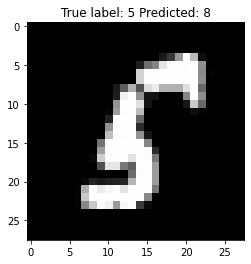

In [24]:
import numpy as np
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label: %a Predicted: %a'%(y_test[i],p_test[i]))